In [353]:
import numpy as np
from PIL import Image

In [354]:
def rysuj_ramke_w_obrazie(obraz, grub):

    tab_obraz = np.asarray(obraz).astype(np.uint8)
    h, w = tab_obraz.shape
    
    #rysowanie czarnej ramki o podanej grubości
    for i in range(grub):  #górna i dolna ramka
        tab_obraz[i, :] = 0
        tab_obraz[h - i - 1, :] = 0

    for j in range(grub):  #lewa i prawa ramka
        tab_obraz[:, j] = 0
        tab_obraz[:, w - j - 1] = 0 

    tab_obraz_bool = tab_obraz.astype(bool)
    return Image.fromarray(tab_obraz_bool)

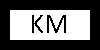

In [355]:
obraz = Image.open('inicjaly.bmp')
rysuj_ramke_w_obrazie(obraz,10)

In [356]:
def rysuj_ramki(w, h, grub):
    tab = np.ones((h, w), dtype=np.uint8)
    
    for i in range(0, min(w, h) // 2, grub * 2):
        tab[i:h-i, i:i+grub] = 0  #lewa
        tab[i:h-i, w-i-grub:w-i] = 0  #prawa
        tab[i:i+grub, i:w-i] = 0  #gorna
        tab[h-i-grub:h-i, i:w-i] = 0  #dolna

    return Image.fromarray(tab.astype(bool))


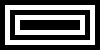

In [357]:
rysuj_ramki(100,50,5)

In [358]:
def rysuj_pasy_pionowe(w, h, grub):
    tab = np.ones((h, w), dtype=np.uint8)

    for j in range(0, w, 2 * grub):
        tab[:, j:j + grub] = 0 

    return Image.fromarray(tab.astype(bool))



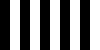

In [359]:
rysuj_pasy_pionowe(100,50,10)

In [360]:
#Funkcja rysująca kwadraty na obrazie o podanym wymiarach: grub x grub 
def rysuj_wlasne(w, h, grub):
    tab = np.ones((h, w), dtype=np.uint8)

    # Rysowanie szachownicy
    for i in range(0, h, grub):
        for j in range(0, w, grub):
            # Sprawdzenie, jaki kolor ma mieć kwadrat w szachownicy
            if (i // grub) % 2 == (j // grub) % 2:
                tab[i:i + grub, j:j + grub] = 0

    return Image.fromarray(tab.astype(bool))

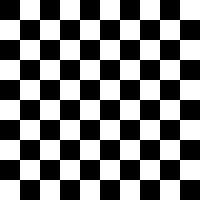

In [361]:
rysuj_wlasne(200,200,20)

In [362]:
def wstaw_obraz_w_obraz(obraz_bazowy, obraz_wstawiany, m, n):

    tab_bazowa = np.asarray(obraz_bazowy).astype(np.uint8)
    tab_wstawiana = np.asarray(obraz_wstawiany).astype(np.uint8)
    
    h_bazowa, w_bazowa = tab_bazowa.shape
    h_wstawiana, w_wstawiana = tab_wstawiana.shape
    
    tab = np.copy(tab_bazowa)
    
    # Obliczanie zakresów wstawiania
    n_k = min(h_bazowa, n + h_wstawiana)
    m_k = min(w_bazowa, m + w_wstawiana)
    n_p = max(0, n) 
    m_p = max(0, m) 
    
    # Przesunięcia dla tavlicy wstawianego obrazu (bierzemy poprawki na n i m)
    n_przesuniecie = n_p - n
    m_przesuniecie = m_p - m
    
    # Wstawianie obrazu w zakresach które wcześniej zostały obliczone
    for i in range(n_p, n_k):
        for j in range(m_p, m_k):
            tab[i, j] = tab_wstawiana[i - n + n_przesuniecie, j - m + m_przesuniecie]
    

    tab = tab.astype(bool)
    
    return Image.fromarray(tab)

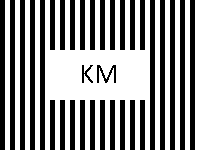

In [363]:
obraz_bazowy = rysuj_pasy_pionowe(200,150,5)
obraz_wstawiany = Image.open('inicjaly.bmp')

wstaw_obraz_w_obraz(obraz_bazowy, obraz_wstawiany, 50, 50)